## Part 1e: TensorFlow - Various Initializations

**Description:**

This Colab demonstrates the effect of different weight initialization strategies on the training of a simple neural network using TensorFlow Keras. Weight initialization sets the starting values of the network's weights before training begins. The choice of initialization can significantly impact the speed of convergence and the final performance of the model.

We will train several identical network architectures, each with a different weight initialization method applied to the dense layers, and compare their performance on the `digits` dataset. The initializers we will explore include:

* `'zeros'`
* `'random_normal'`
* `'glorot_normal'` (also known as Xavier normal)
* `'he_normal'` (also known as MSRA normal)


Training model with zeros initialization:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


zeros - Test Accuracy: 0.07777778059244156

Training model with random_normal initialization:
random_normal - Test Accuracy: 0.9722222089767456

Training model with glorot_normal initialization:
glorot_normal - Test Accuracy: 0.9777777791023254

Training model with he_normal initialization:
he_normal - Test Accuracy: 0.9777777791023254


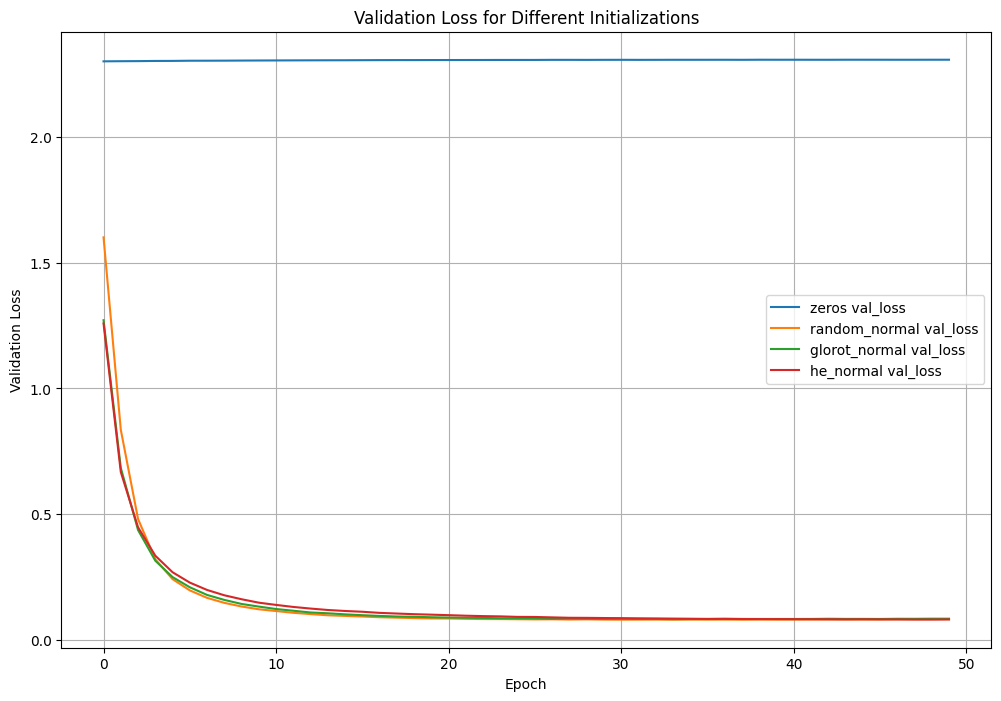

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to create a model with a specified initializer
def create_model_with_initializer(initializer_name='glorot_normal'):
    return models.Sequential([
        layers.Dense(64, activation='relu', kernel_initializer=initializer_name, input_shape=(X_train.shape[1],)),
        layers.Dense(10, activation='softmax', kernel_initializer=initializer_name)
    ])

# Define the initializers to test
initializer_names = ['zeros', 'random_normal', 'glorot_normal', 'he_normal']
histories = {}

# Train and evaluate models with different initializers
for initializer_name in initializer_names:
    print(f"\nTraining model with {initializer_name} initialization:")
    model = create_model_with_initializer(initializer_name=initializer_name)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{initializer_name} - Test Accuracy:", accuracy)
    histories[initializer_name] = history

# Optional: Plotting the training history to visualize the impact of initialization
plt.figure(figsize=(12, 8))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} val_loss')
plt.title('Validation Loss for Different Initializations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Results for Part 1e: TensorFlow - Various Initializations

In this experiment, we trained four identical simple neural network architectures on the `digits` dataset, each using a different weight initialization strategy for the kernel weights of the dense layers: `'zeros'`, `'random_normal'`, `'glorot_normal'`, and `'he_normal'`. We then compared their test accuracies and the validation loss curves during training.

The test accuracies achieved by each model are as follows:

* **Zeros Initialization - Test Accuracy:** 0.0778
* **Random Normal Initialization - Test Accuracy:** 0.9722
* **Glorot Normal Initialization - Test Accuracy:** 0.9778
* **He Normal Initialization - Test Accuracy:** 0.9778

**Analysis:**

The results and the validation loss plot clearly illustrate the significant impact of weight initialization on the training and performance of the neural network:

* **Zeros Initialization:** The model initialized with all weights set to zero performed drastically worse, achieving a test accuracy of only 0.0778. The validation loss remained very high and flat throughout training, indicating that the network failed to learn effectively. This is due to the symmetry problem, where all neurons in a layer learn the same features, preventing the network from breaking symmetry and learning diverse representations.

* **Random Normal Initialization:** Initializing weights with a random normal distribution led to much better performance, achieving a test accuracy of 0.9722. The validation loss decreased significantly during training, indicating successful learning.

* **Glorot Normal Initialization (Xavier Normal):** This initialization strategy, designed to keep the variance of the gradients roughly the same across all layers, resulted in a high test accuracy of 0.9778. The validation loss decreased smoothly and reached a low value. Glorot initialization is often effective for networks with activation functions like sigmoid or tanh.

* **He Normal Initialization (MSRA Normal):** This initialization method, tailored for ReLU activation functions by considering the number of incoming connections to a neuron, also achieved a high test accuracy of 0.9778. The validation loss curve is similar to that of Glorot normal. He initialization helps in mitigating the vanishing/exploding gradients problem in deep networks with ReLU activations.

**A/B Test Comparison:**

The comparison of these different initialization strategies clearly demonstrates that the choice of initialization is critical for successful training. Initializing weights to zero leads to a non-functional network. Random initialization allows the network to learn, and more sophisticated methods like Glorot and He initialization, which take into account the activation functions and layer sizes, can contribute to stable and effective training, leading to high performance. In this case, both Glorot and He normal initializations performed slightly better than simple random normal initialization.